In [1]:
import numpy as np
import random
import pickle


In [2]:
# !pip install pyspark

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession\
    .builder\
    .appName("recommender")\
    .getOrCreate()
sc = spark.sparkContext

22/12/19 00:05:05 WARN Utils: Your hostname, noing-Latitude-E5550 resolves to a loopback address: 127.0.1.1; using 192.168.1.16 instead (on interface wlp2s0)
22/12/19 00:05:05 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/19 00:05:06 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [9]:
data = sc.textFile("../data/ml-100k/u.data")
originRDD = data.map(
  lambda l: l.split('\t')
).map(
  lambda l: (int(l[0]), int(l[1]), float(l[2]))
)


In [10]:
trainRDD, testRDD = originRDD.randomSplit([0.8,0.2], 42)

In [11]:
from recommenders.self_recommender import DSGD, ALS

/home/noing/git/recommender_implement_with_spark/experiment/recommenders/self_recommender.py:51: RuntimeWarning: overflow encountered in add
  sse = R.map(lambda x: (x[2] - w.value[x[0]].dot(h.value[x[1]].T))**2 ).reduce(lambda x,y: x+y)


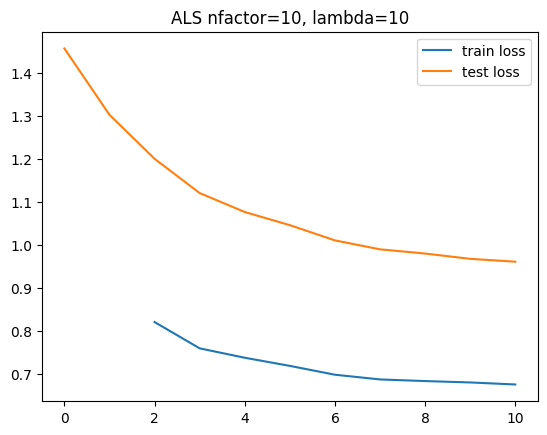

In [12]:
ALSmodel = DSGD(step_size=0.001,num_factor=10, max_iter=10, lambd=0.5)
ALSmodel.train(sc, originRDD, trainRDD, testRDD)
ALSmodel.plot_rmse('ALS nfactor=10, lambda=10')

/home/noing/git/recommender_implement_with_spark/self_recommender.py:51: RuntimeWarning: overflow encountered in add
  sse = R.map(lambda x: (x[2] - w.value[x[0]].dot(h.value[x[1]].T))**2 ).reduce(lambda x,y: x+y)


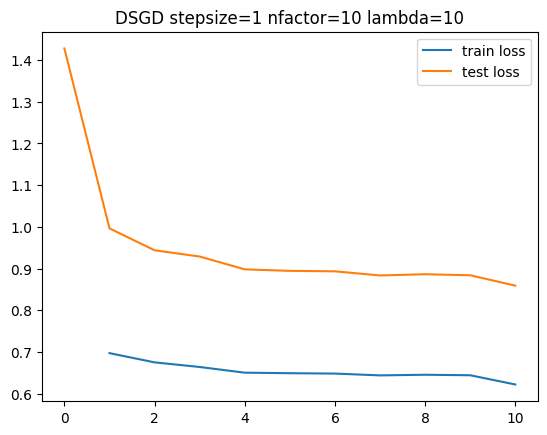

In [8]:
SGDmodel = DSGD(step_size=0.01, num_factor=10, max_iter=10, lambd=10)
SGDmodel.train(sc, originRDD, trainRDD, testRDD)
SGDmodel.plot_rmse('DSGD stepsize=1 nfactor=10 lambda=10')


In [11]:
print(SGDmodel.get_test_rmse())
print(ALSmodel.get_test_rmse())

0.8590037
0.9599240673601872
